In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans

In [2]:
customers_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer Segmentation/customers_data.csv')

# Data Exploration And Analysis

In [4]:
print(f'DATA SHAPE : [{customers_data.shape[0]} ROWS ,{customers_data.shape[1]} COLUMNS ]')

DATA SHAPE : [200 ROWS ,5 COLUMNS ]


In [3]:
customers_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
customers_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
customers_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
customers_data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

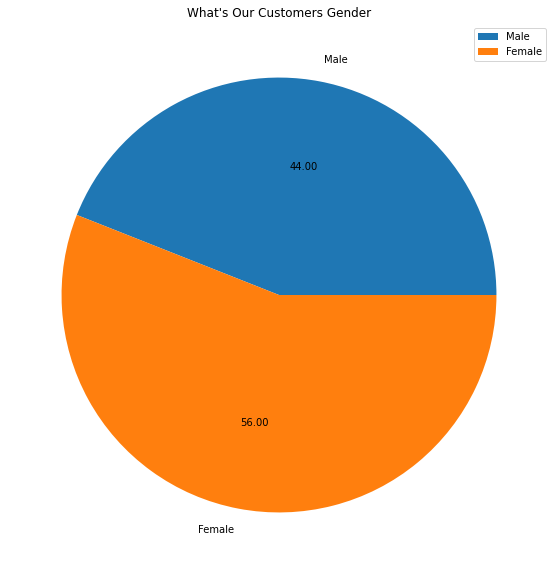

In [15]:
Gender_Values = [customers_data['Gender'].value_counts()[1],customers_data['Gender'].value_counts()[0]]
Gender_Labels = ['Male','Female']

plt.figure(figsize=(10, 10))
plt.title("What's Our Customers Gender")

plt.pie(Gender_Values,labels =Gender_Labels,autopct='%.2f')
plt.legend()
plt.show() 

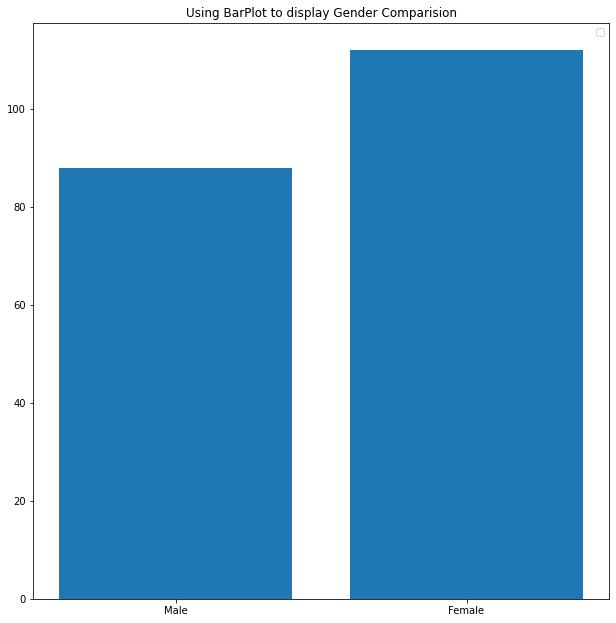

In [31]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
Gender_Values = [customers_data['Gender'].value_counts()[1],customers_data['Gender'].value_counts()[0]]
Gender_Labels = ['Male','Female']
ax.bar(Gender_Labels,Gender_Values)
plt.title('Using BarPlot to display Gender Comparision')
plt.legend()
plt.show()

In [36]:
print(f"Customer's Age Stats :\n(1) Mean : {customers_data['Age'].mean()}\n(2) Median : {customers_data['Age'].median()}\n(3) Mode : {customers_data['Age'].mode()}")

Customer's Age Stats :
(1) Mean : 38.85
(2) Median : 36.0
(3) Mode : 0    32
dtype: int64


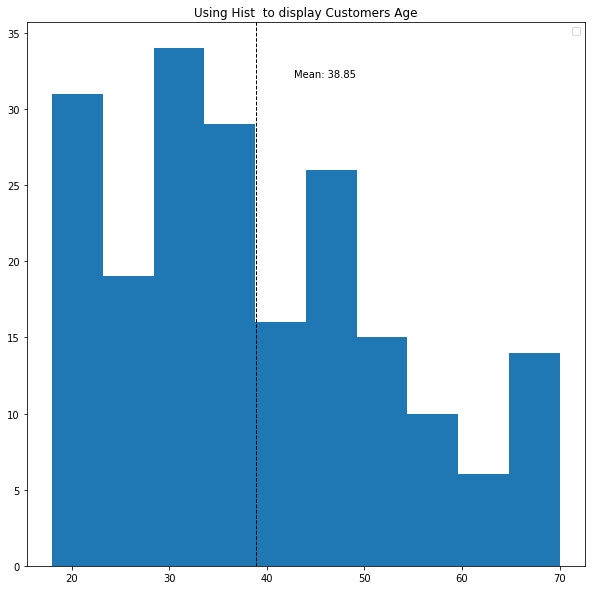

In [53]:
fig = plt.figure(figsize=(10,10))
plt.hist(customers_data['Age'])

plt.axvline(customers_data['Age'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(customers_data['Age'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(customers_data['Age'].mean()))

plt.title('Using Hist  to display Customers Age')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


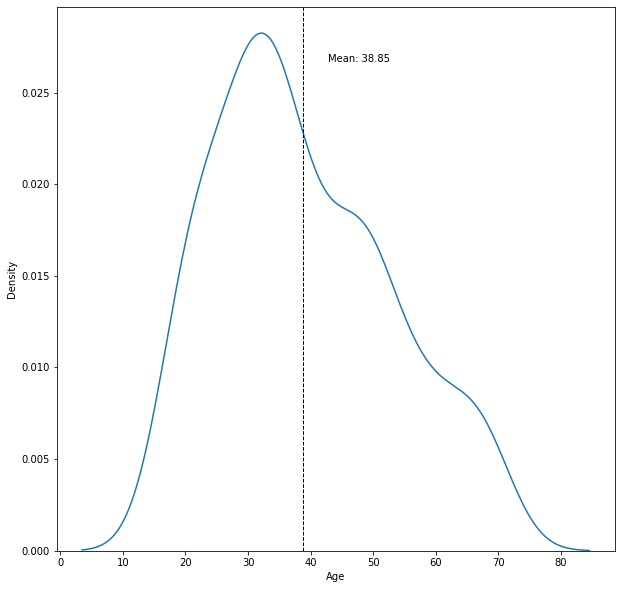

In [54]:
fig = plt.figure(figsize=(10,10))
sns.distplot(customers_data['Age'],hist=False)
plt.axvline(customers_data['Age'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(customers_data['Age'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(customers_data['Age'].mean()))

plt.show()

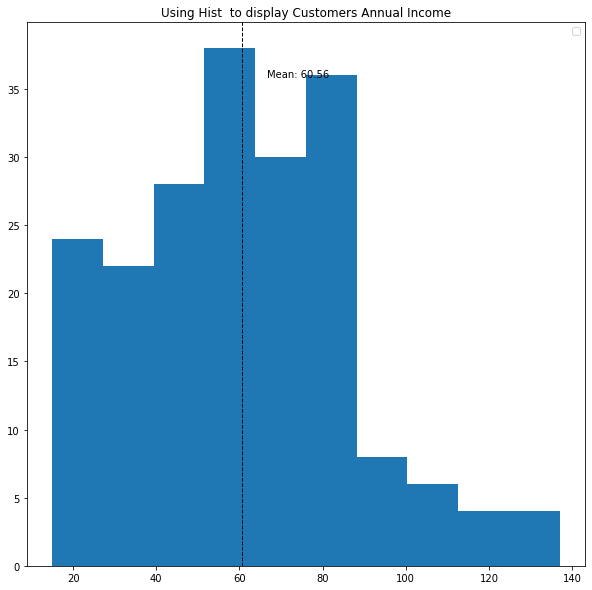

In [74]:
fig = plt.figure(figsize=(10,10))
plt.hist(customers_data['Annual Income (k$)'])

plt.axvline(customers_data['Annual Income (k$)'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(customers_data['Annual Income (k$)'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(customers_data['Annual Income (k$)'].mean()))

plt.title('Using Hist  to display Customers Annual Income')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


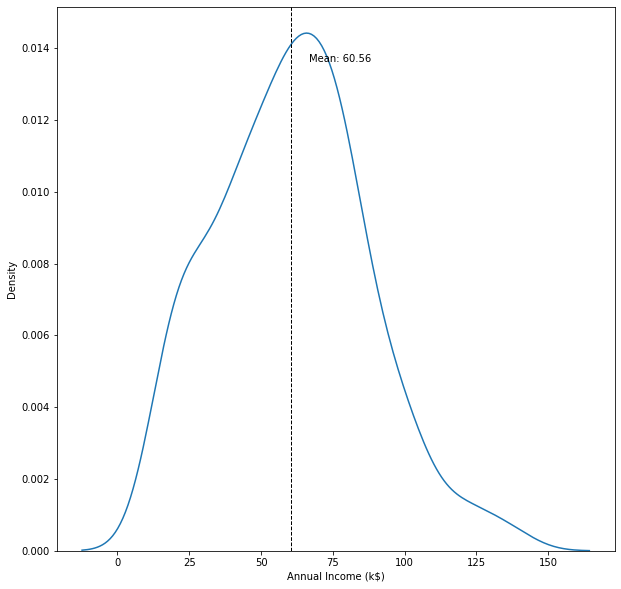

In [75]:
fig = plt.figure(figsize=(10,10))
sns.distplot(customers_data['Annual Income (k$)'],hist=False)
plt.axvline(customers_data['Annual Income (k$)'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(customers_data['Annual Income (k$)'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(customers_data['Annual Income (k$)'].mean()))

plt.show()

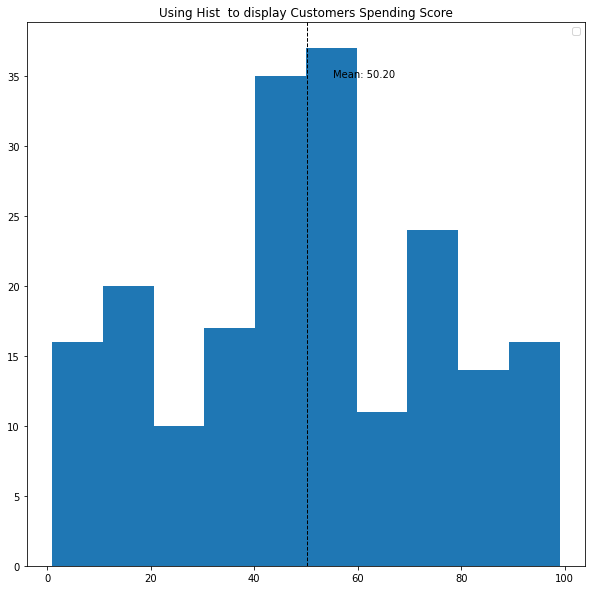

In [76]:
fig = plt.figure(figsize=(10,10))
plt.hist(customers_data['Spending Score (1-100)'])

plt.axvline(customers_data['Spending Score (1-100)'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(customers_data['Spending Score (1-100)'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(customers_data['Spending Score (1-100)'].mean()))

plt.title('Using Hist  to display Customers Spending Score')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


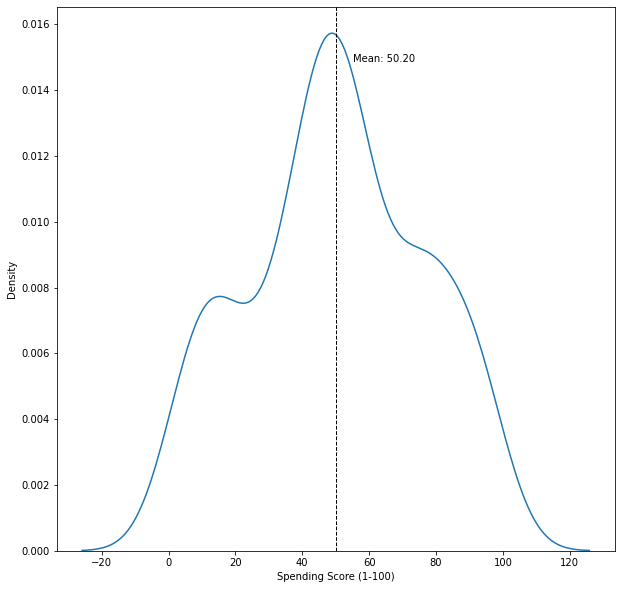

In [77]:
fig = plt.figure(figsize=(10,10))
sns.distplot(customers_data['Spending Score (1-100)'],hist=False)
plt.axvline(customers_data['Spending Score (1-100)'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(customers_data['Spending Score (1-100)'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(customers_data['Spending Score (1-100)'].mean()))

plt.show()

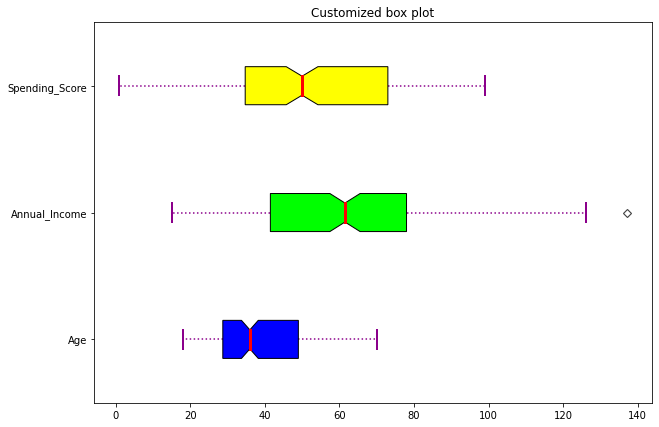

In [73]:
Age = customers_data['Age']
Annual_Income = customers_data['Annual Income (k$)']
Spending_Score = customers_data['Spending Score (1-100)']
data = [Age, Annual_Income,Spending_Score]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['Age','Annual_Income','Spending_Score'])
 
# Adding title
plt.title("Customized box plot")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

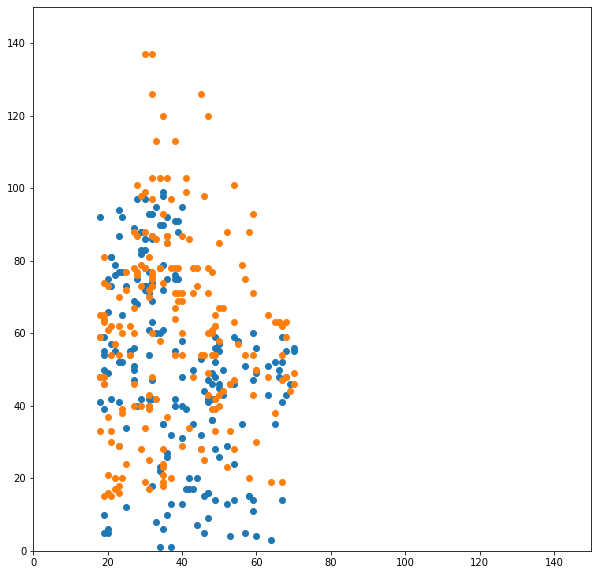

In [87]:
plt.figure(figsize=(10,10))
plt.scatter(customers_data['Age'],customers_data['Spending Score (1-100)'])
plt.scatter(customers_data['Age'],customers_data['Annual Income (k$)'])
plt.xlim(0,150)
plt.ylim(0,150)
plt.show()

In [94]:
X = customers_data.drop(['CustomerID','Gender'],axis=1)

In [95]:
kmeans = KMeans(3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [96]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

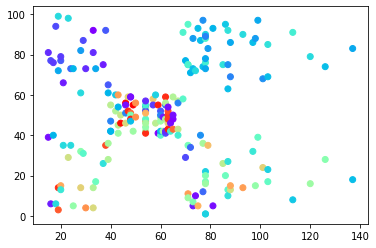

In [98]:
data_with_clusters = X.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c=X['Age'],cmap='rainbow')


In [99]:
from joblib import dump, load
dump(kmeans,'kmeans')

['kmeans']